In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [ ]:
data = pd.read_csv('/content/microchips.csv', header=None)
data.columns = ['x','y','label']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Implement and use k-NN to predict whether three unknown microchips are likely to be OK or Fail. The properties associated with the three unknown microchips are (−0.3, 1.0),(−0.5, −0, 1), and (0.6, 0.0), and you should repeat the experiments for k = 1, 3, 5, 7

In [ ]:
K = [1,3,5,7]
trainX = data.drop('label', axis=1)
trainY = data['label']
for k in K:
  print("Predictions for k = ", k)
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(trainX, trainY)
  test = [[-0.3,1.0],[-0.5,-0.1],[0.6,0.0]]
  for t in test:
    pred_class = neigh.predict([t])
    if(pred_class == 1):
      class_label = 'OK'
    else:
      class_label = 'Fail'
    print("Predicted class label for ",t, " : ",pred_class," ( ",class_label," )") 
  print("----------")

Predictions for k =  1
Predicted class label for  [-0.3, 1.0]  :  [1]  (  OK  )
Predicted class label for  [-0.5, -0.1]  :  [0]  (  Fail  )
Predicted class label for  [0.6, 0.0]  :  [0]  (  Fail  )
----------
Predictions for k =  3
Predicted class label for  [-0.3, 1.0]  :  [0]  (  Fail  )
Predicted class label for  [-0.5, -0.1]  :  [0]  (  Fail  )
Predicted class label for  [0.6, 0.0]  :  [1]  (  OK  )
----------
Predictions for k =  5
Predicted class label for  [-0.3, 1.0]  :  [0]  (  Fail  )
Predicted class label for  [-0.5, -0.1]  :  [1]  (  OK  )
Predicted class label for  [0.6, 0.0]  :  [1]  (  OK  )
----------
Predictions for k =  7
Predicted class label for  [-0.3, 1.0]  :  [0]  (  Fail  )
Predicted class label for  [-0.5, -0.1]  :  [0]  (  Fail  )
Predicted class label for  [0.6, 0.0]  :  [1]  (  OK  )
----------


Display a 2 × 2 plot similar to Figure 1 showing the decision boundary and the training error for k = 1, 3, 5, 7.

In [ ]:
k = [1,3,5,7]
Z = []
error_list = []
for k in K:
  print("Started predictions for k = ", k)
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(trainX, trainY)
  xx, yy = np.meshgrid(np.arange(-1, 1.5, 0.01), np.arange(-1, 1.5, 0.01))
  points = np.c_[xx.ravel(), yy.ravel()]
  predictions = []
  error = 0
  predictions = neigh.predict(points)

  pred_class = neigh.predict(trainX)
  error = len(trainX) - (accuracy_score(trainY, pred_class, normalize=False))

  Z.append(np.array(predictions).reshape(xx.shape))
  error_list.append(error)
  print("Training errors count for K = ",k, " : ",error)

Started predictions for k =  1
Training errors count for K =  1  :  0
Started predictions for k =  3
Training errors count for K =  3  :  16
Started predictions for k =  5
Training errors count for K =  5  :  17
Started predictions for k =  7
Training errors count for K =  7  :  19


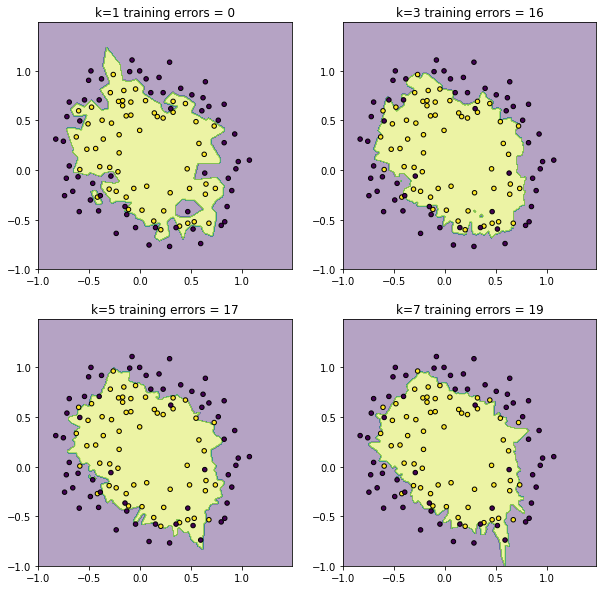

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].contourf(xx, yy, Z[0],alpha=0.4)
axs[0, 0].scatter(data['x'], data['y'], c = data['label'], s = 20, edgecolor='k')
title = 'k=1 training errors = ' + str(error_list[0])
axs[0, 0].set_title(title)

axs[0, 1].contourf(xx, yy, Z[1],alpha=0.4)
axs[0, 1].scatter(data['x'], data['y'], c = data['label'], s = 20, edgecolor='k')
title = 'k=3 training errors = ' + str(error_list[1])
axs[0, 1].set_title(title)

axs[1, 0].contourf(xx, yy, Z[2],alpha=0.4)
axs[1, 0].scatter(data['x'], data['y'], c = data['label'], s = 20, edgecolor='k')
title = 'k=5 training errors = ' + str(error_list[2])
axs[1, 0].set_title(title)

axs[1, 1].contourf(xx, yy, Z[3],alpha=0.4)
axs[1, 1].scatter(data['x'], data['y'], c = data['label'], s = 20, edgecolor='k')
title = 'k=7 training errors = ' + str(error_list[3])
axs[1, 1].set_title(title)

plt.show()